In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Préparation des données

##  Information sur les données

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
X = data.drop("median_house_value", axis=1)
Y = data.median_house_value

Nous allons traiter un problème de regression car les valeurs sont toutes différentes et non classifiable

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
na = data['total_bedrooms'].isna().sum()

In [6]:
print(f'Il manque {na} données pour la colonne "total_bedrooms"')

Il manque 207 données pour la colonne "total_bedrooms"


In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BF84BA820>,
      dtype=object)

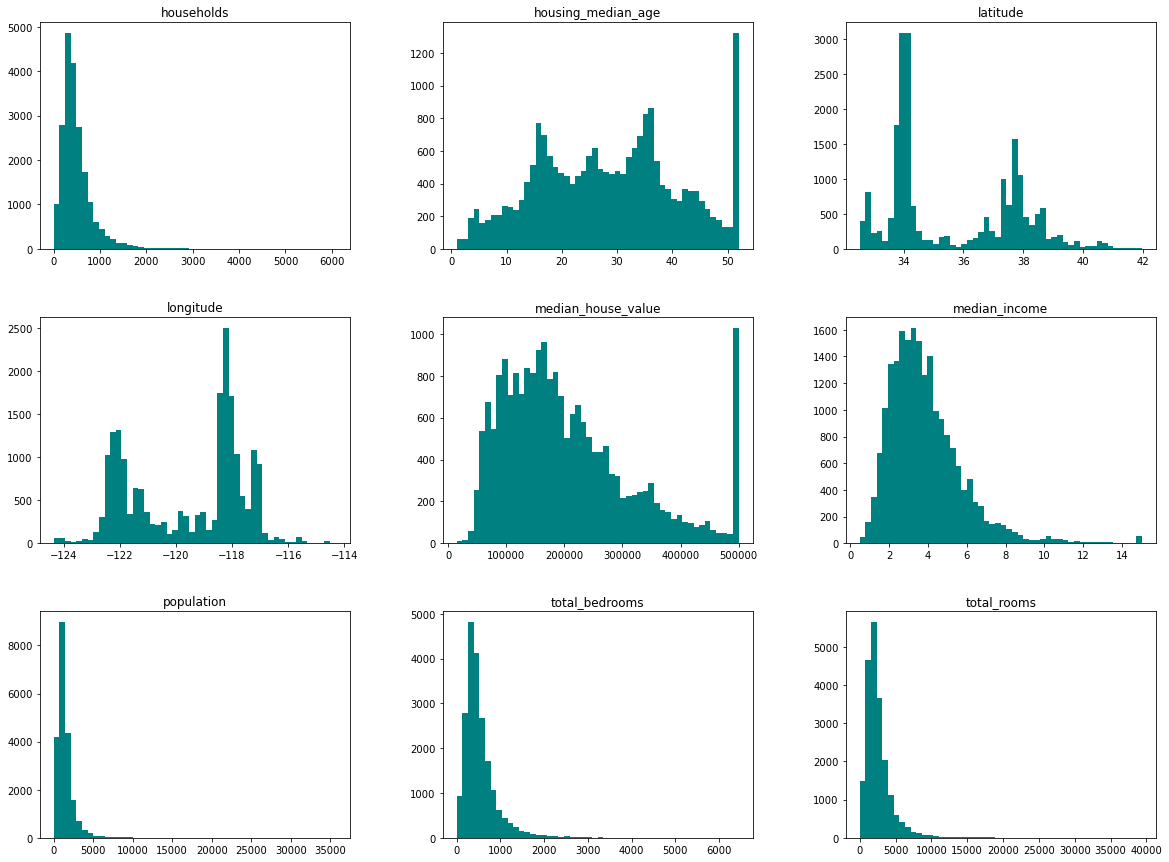

In [9]:
data.hist(bins=50, figsize=(20,15), color='teal', grid=False)

## Répartition des données

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY


## Découverte et visualisation des données

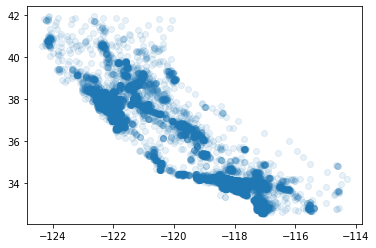

In [12]:
plt.scatter(x_train['longitude'], x_train['latitude'], alpha=0.1)
plt.show()

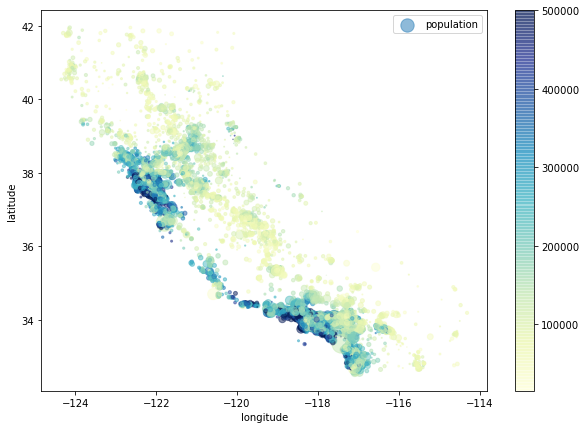

In [13]:
x_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
         s=x_train['population']/100,
         label='population',   
         c=y_train,                     
         cmap=plt.get_cmap('YlGnBu'),      
         colorbar=True,
         sharex=False,
         figsize=(10,7),
         zorder=1)

plt.legend()

In [14]:
image = plt.imread('california.png')

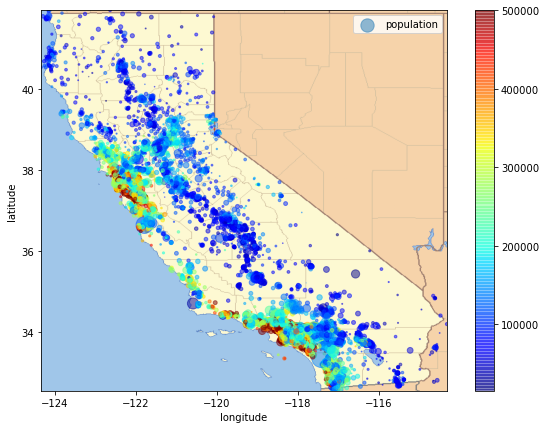

In [15]:
fig, ax = plt.subplots(figsize = (10,7))

ax.imshow(image,zorder=0,extent=[x_train['longitude'].min(),x_train['longitude'].max(),x_train['latitude'].min(),x_train['latitude'].max()])

x_train.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=x_train['population']/100,
    label='population',   
    c=y_train,                     
    cmap=plt.get_cmap('jet'),      
    colorbar=True,
    sharex=False,
    zorder=1)

plt.legend()


In [16]:
x_train.corrwith(y_train)

longitude            -0.047277
latitude             -0.142702
housing_median_age    0.106470
total_rooms           0.133016
total_bedrooms        0.045394
population           -0.027053
households            0.062294
median_income         0.692758
dtype: float64

## Nettoyage des données

In [17]:
x_train_quanti = x_train.drop(x_train.select_dtypes(include=object), axis=1)
x_test_quanti = x_test.drop(x_train.select_dtypes(include=object), axis=1)

x_train_quali = x_train.copy().select_dtypes(include=object)
x_test_quali = x_test.copy().select_dtypes(include=object)

In [18]:
x_train_quanti.fillna(x_train_quanti.median(), inplace=True)
x_test_quanti.fillna(x_test_quanti.median(), inplace=True)

x_train_quanti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [19]:
x_train_quali['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5227
NEAR OCEAN    2146
NEAR BAY      1824
ISLAND           3
Name: ocean_proximity, dtype: int64

In [20]:
LabelEnc = LabelEncoder()

x_train_quali = x_train_quali.apply(LabelEnc.fit_transform)
x_test_quali = x_test_quali.apply(LabelEnc.fit_transform)
x_test_quali.head(10)

,ocean_proximity
14740,4
10101,0
20566,1
2670,1
15709,3
439,3
845,3
3768,0
964,0
8681,0


In [21]:
x_train = pd.concat([x_train_quanti, x_train_quali], axis=1)
x_test = pd.concat([x_test_quanti, x_test_quali], axis=1)

# Sélection, apprentissage et évaluation du modèle

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

print("y_train:\n", y_train[0:5].values.reshape(-1, 1))
print("y_pred:\n",y_pred[0:5].reshape(-1, 1))

y_train:
 [[500001.]
 [270000.]
 [196100.]
 [118800.]
 [225000.]]
y_pred:
 [[176148.95760836]
 [279753.74331494]
 [215163.17883349]
 [124764.58558605]
 [244436.88821961]]


In [23]:
np.sqrt(mean_squared_error(y_train, y_pred))

69618.66583032011

In [24]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_train)

In [25]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.0

In [26]:
cross = abs(cross_val_score(tree, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print("Valeurs des MSE pour chaque fold:\n")
for i, cr in enumerate(cross, 1):
    print("MSE fold",i , cr)

Valeurs des MSE pour chaque fold:

MSE fold 1 5356051127.525424
MSE fold 2 4760343256.338378
MSE fold 3 4855689648.254392
MSE fold 4 4398844434.324652
MSE fold 5 5900759194.470624
MSE fold 6 4851840862.800121
MSE fold 7 4542462380.0466385
MSE fold 8 5008996944.198062
MSE fold 9 4562574782.233192
MSE fold 10 4654867305.672319


In [27]:
print("Moyenne des RSE:\n", cross.mean())

Moyenne des RSE:
 4889242993.586381


In [28]:
print("Ecart type des RSE:\n", cross.std())

Ecart type des RSE:
 423904161.3536996


#  Fine-Tunning

##  Grid Search

In [29]:
RForest = RandomForestRegressor()
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
CV = GridSearchCV(estimator=RForest, cv=5, param_grid=param_grid)
CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

In [30]:
y_pred = CV.predict(x_train)
CV.score(x_train, y_train)

0.9724972990975241

In [31]:
bestCV = CV.best_estimator_

In [32]:
pd.DataFrame(CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054444,0.000640,0.003403,0.000491,2,3,"{'max_features': 2, 'n_estimators': 3}",0.726796,0.723038,0.686390,0.705307,0.711687,0.710643,0.014369,12
1,0.170281,0.001351,0.008130,0.000455,2,10,"{'max_features': 2, 'n_estimators': 10}",0.778465,0.796273,0.767824,0.786204,0.786423,0.783038,0.009477,8
2,0.498980,0.002903,0.021225,0.000731,2,30,"{'max_features': 2, 'n_estimators': 30}",0.794345,0.811002,0.785813,0.811156,0.799950,0.800453,0.009775,4
3,0.085183,0.001682,0.003602,0.000342,4,3,"{'max_features': 4, 'n_estimators': 3}",0.737637,0.755775,0.726472,0.747860,0.731569,0.739863,0.010679,10
4,0.285034,0.006832,0.008222,0.000319,4,10,"{'max_features': 4, 'n_estimators': 10}",0.782702,0.802105,0.781674,0.806386,0.790002,0.792574,0.010045,6
5,0.847251,0.014618,0.021401,0.000590,4,30,"{'max_features': 4, 'n_estimators': 30}",0.809434,0.817051,0.799873,0.824711,0.812672,0.812748,0.008227,2
6,0.118115,0.001819,0.003001,0.000004,6,3,"{'max_features': 6, 'n_estimators': 3}",0.729805,0.746908,0.718769,0.756150,0.740848,0.738496,0.013059,11
7,0.399063,0.012671,0.008324,0.000474,6,10,"{'max_features': 6, 'n_estimators': 10}",0.786415,0.804849,0.782941,0.811346,0.799945,0.797099,0.010823,5
8,1.160718,0.011080,0.021727,0.000750,6,30,"{'max_features': 6, 'n_estimators': 30}",0.809261,0.820555,0.798596,0.821909,0.815802,0.813225,0.008550,1
9,0.155484,0.006614,0.003337,0.000324,8,3,"{'max_features': 8, 'n_estimators': 3}",0.727097,0.739206,0.740058,0.758377,0.753895,0.743727,0.011211,9


## Evaluation sur la base de test

In [33]:
y_pred = bestCV.predict(x_test)

np.sqrt(mean_squared_error(y_test, y_pred))

48896.83621053575

In [34]:
bestCV.score(x_test, y_test)

0.8166423863926858